- 그림 만드는 기초

---

### import 

In [1]:
import torch 
from fastai.vision.all import *
import cv2

In [2]:
import numpy as np

In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
from torchvision.utils import save_image
import os

---

### data 

In [6]:
path=untar_data(URLs.PETS)/'images'

In [7]:
path

Path('/home/khy/.fastai/data/oxford-iiit-pet/images')

In [8]:
path.ls()

(#7390) [Path('/home/khy/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Sphynx_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/British_Shorthair_203.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Ragdoll_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Persian_272.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Bombay_200.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/shiba_inu_103.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/chihuahua_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/scottish_terrier_156.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/basset_hound_163.jpg')...]

In [9]:
files=get_image_files(path)

In [10]:
def label_func(f):
    if f[0].isupper():
        return 'cat' 
    else: 
        return 'dog' 

In [11]:
dls=ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(512)) 

---

### learn

In [12]:
lrnr=cnn_learner(dls,resnet34,metrics=error_rate)
lrnr.fine_tune(1)

In [13]:
net1=lrnr.model[0]
net2=lrnr.model[1] 

In [14]:
net2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [15]:
net=torch.nn.Sequential(net1,net2)

In [16]:
lrnr2=Learner(dls,net,metrics=accuracy) 

In [17]:
lrnr2.fine_tune(10) 

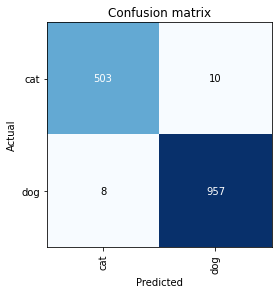

In [18]:
interp = ClassificationInterpretation.from_learner(lrnr2)
interp.plot_confusion_matrix()

In [19]:
interp.print_classification_report()

              precision    recall  f1-score   support

         cat       0.98      0.98      0.98       513
         dog       0.99      0.99      0.99       965

    accuracy                           0.99      1478
   macro avg       0.99      0.99      0.99      1478
weighted avg       0.99      0.99      0.99      1478



---

### **전체 적용하기**

In [20]:
path=untar_data(URLs.PETS)/'images'

In [21]:
if str(list(path.ls())[103]).split('/')[-1].split('.')[-1]=="jpg" :
    print("jpg")
#name=str(list(path.ls())[i]).split('/')[-1]

jpg


In [22]:
path.ls()

(#7390) [Path('/home/khy/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Sphynx_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/British_Shorthair_203.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Ragdoll_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Persian_272.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Bombay_200.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/shiba_inu_103.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/chihuahua_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/scottish_terrier_156.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/basset_hound_163.jpg')...]

In [23]:
for i in range(7393) :
    img = PILImage.create(get_image_files(path)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if fname!="jpg" : 
        print(name)
    else : pass

KeyboardInterrupt: 

- `.mat` 파일 삭제

In [ ]:
#os.remove(r"/home/khy/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat")

In [ ]:
#os.remove(r"/home/khy/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat")

In [ ]:
#os.remove(r"/home/khy/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat")

In [24]:
#path.ls()  #삭제된 거 확인

(#7390) [Path('/home/khy/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Sphynx_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/British_Shorthair_203.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Ragdoll_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Persian_272.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/Bombay_200.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/shiba_inu_103.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/chihuahua_142.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/scottish_terrier_156.jpg'),Path('/home/khy/.fastai/data/oxford-iiit-pet/images/basset_hound_163.jpg')...]

In [ ]:
#len(path.ls())

In [ ]:
#os.mkdir("1103_pet")

In [ ]:
for i in range(len(path.ls())) :
    img = PILImage.create(get_image_files(path)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    (w, h) = (img.shape[0], img.shape[1])
    a = random.uniform(0, w*0.7)
    b = random.uniform(0, h*0.9)
    shape = [(a, b), (a+100, b+50)]
    font = ImageFont.truetype("DejaVuSans.ttf", round(h*0.08))
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if name[0].isupper() == True :
        img1 = ImageDraw.Draw(img)  
        img1.rectangle(shape, fill ="white", outline ="black")
        ImageDraw.Draw(img).text((a, b), 'CAT', (0,0,0), font=font)
        img.save("1103_pet/"+name)
    else: 
        img1 = ImageDraw.Draw(img)  
        img1.rectangle(shape, fill ="black", outline ="black")
        ImageDraw.Draw(img).text((a, b), 'DOG', (255,255,255), font=font)
        img.save("1103_pet/"+name)

## ★랜덤 시행 결과 보기

In [20]:
path_r=Path('1103_pet')   #랜덤박스넣은사진

In [21]:
path_r.ls()

(#7391) [Path('1103_pet/boxer_128.jpg'),Path('1103_pet/Sphynx_142.jpg'),Path('1103_pet/British_Shorthair_203.jpg'),Path('1103_pet/Ragdoll_142.jpg'),Path('1103_pet/Persian_272.jpg'),Path('1103_pet/Bombay_200.jpg'),Path('1103_pet/shiba_inu_103.jpg'),Path('1103_pet/chihuahua_142.jpg'),Path('1103_pet/scottish_terrier_156.jpg'),Path('1103_pet/basset_hound_163.jpg')...]

In [22]:
files=get_image_files(path_r)

In [23]:
dls_r=ImageDataLoaders.from_name_func(path_r,files,label_func,item_tfms=Resize(512)) 

In [24]:
lrnr_r1=cnn_learner(dls_r,resnet34,metrics=error_rate)
lrnr_r1.fine_tune(1)

In [25]:
net_1=lrnr_r1.model[0]
net_2=lrnr_r1.model[1] 

In [26]:
net_2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [27]:
net_r=torch.nn.Sequential(net_1,net_2)

In [28]:
lrnr_r2=Learner(dls_r,net_r,metrics=accuracy) 

In [29]:
lrnr_r2.fine_tune(10) 

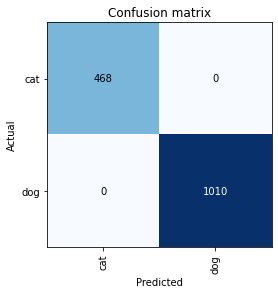

In [30]:
interp = ClassificationInterpretation.from_learner(lrnr_r2)
interp.plot_confusion_matrix()

In [31]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[7389])]))

In [32]:
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())

In [33]:
x.shape

torch.Size([1, 3, 512, 512])

In [34]:
camimg.shape

torch.Size([2, 16, 16])

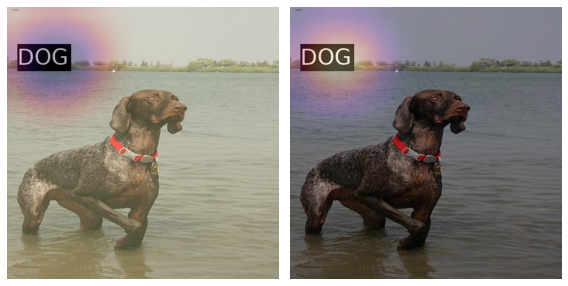

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(camimg[0].to("cpu").detach(),alpha=0.3,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(camimg[1].to("cpu").detach(),alpha=0.3,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

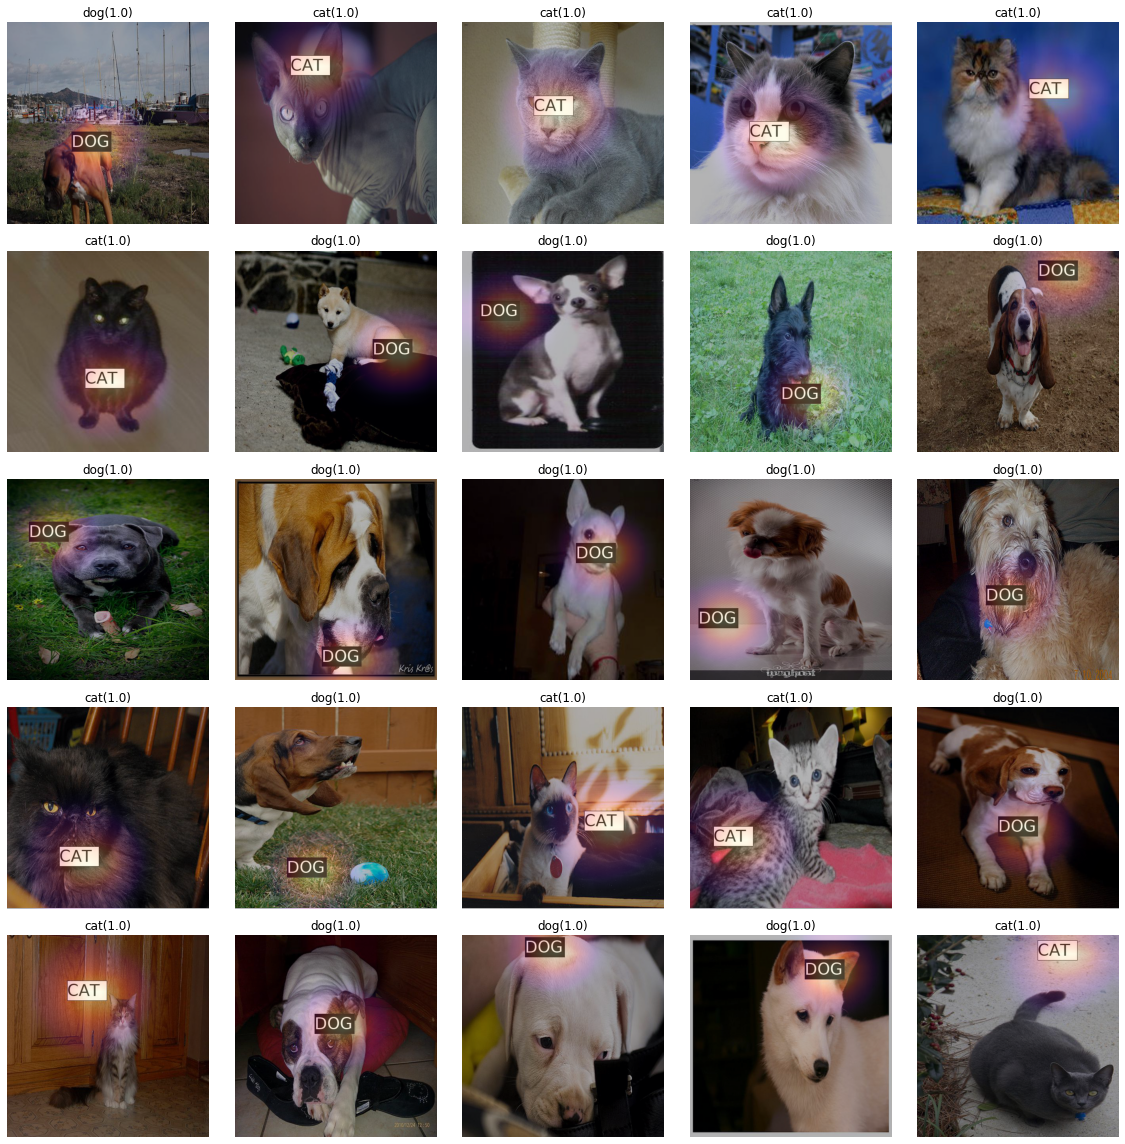

In [36]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b)) 
        if catprob>dogprob: 
            dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(camimg[0].to("cpu").detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(camimg[1].to("cpu").detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

- 마스킹 되는 것 확인

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

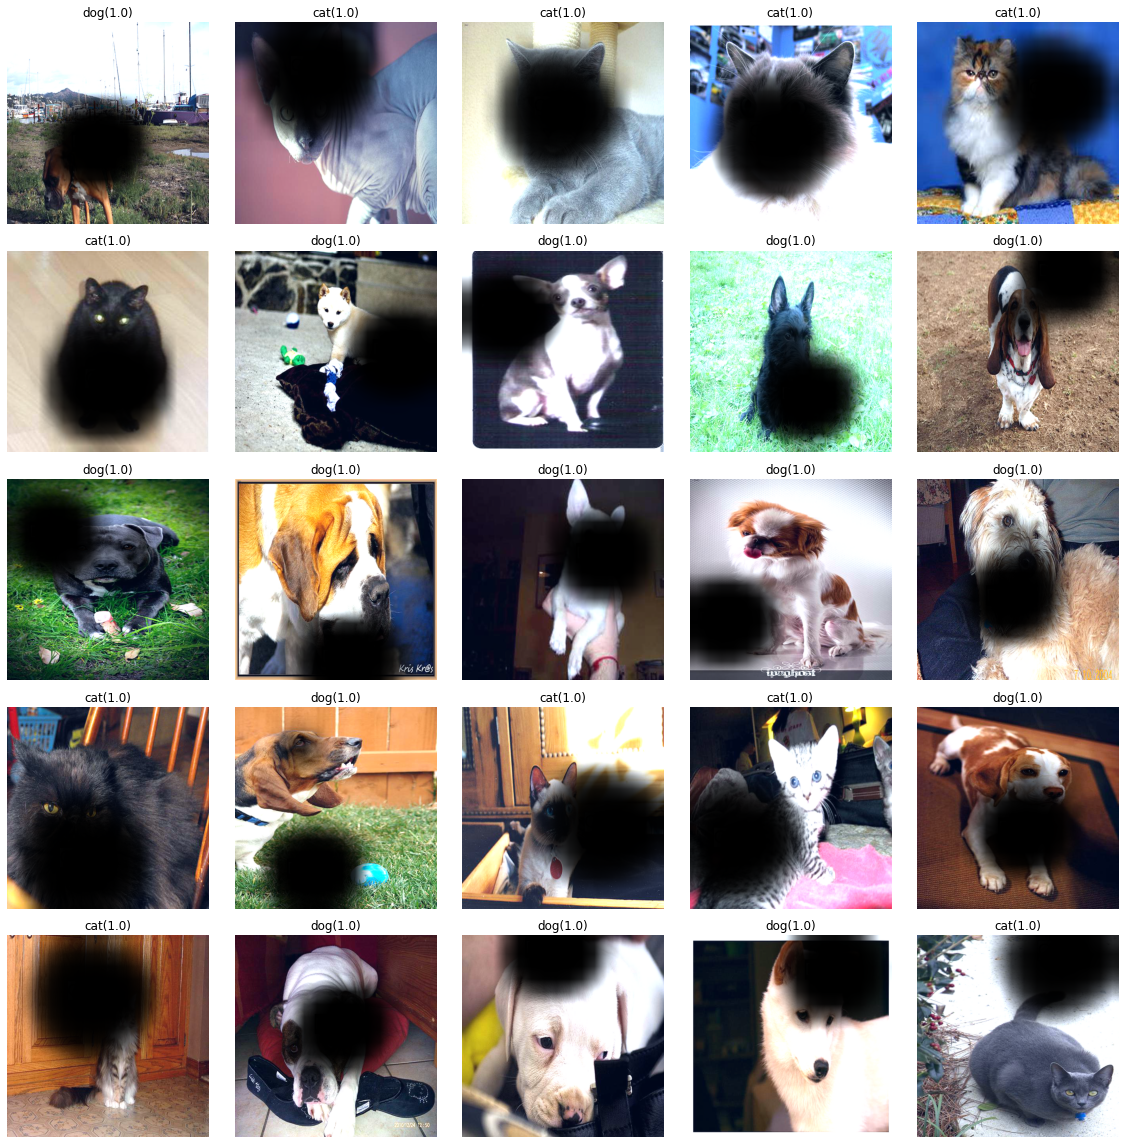

In [39]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
        if catprob>dogprob: 
            test=camimg[0]-torch.min(camimg[0])
            A1=torch.exp(-0.1*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.35).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            test=camimg[1]-torch.min(camimg[1])
            A1=torch.exp(-0.1*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.35).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

- Mode 1 residual 생성하기

    - `.mat`확인 및 제거

In [40]:
path_r.ls()

(#7391) [Path('1103_pet/boxer_128.jpg'),Path('1103_pet/Sphynx_142.jpg'),Path('1103_pet/British_Shorthair_203.jpg'),Path('1103_pet/Ragdoll_142.jpg'),Path('1103_pet/Persian_272.jpg'),Path('1103_pet/Bombay_200.jpg'),Path('1103_pet/shiba_inu_103.jpg'),Path('1103_pet/chihuahua_142.jpg'),Path('1103_pet/scottish_terrier_156.jpg'),Path('1103_pet/basset_hound_163.jpg')...]

In [41]:
for i in range(len(path_r.ls())) :
    img = PILImage.create(get_image_files(path_r)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if fname!="jpg" : 
        print(name)
    else : pass

IndexError: list index out of range

- `.mat` 파일 발견 못함

    - Sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


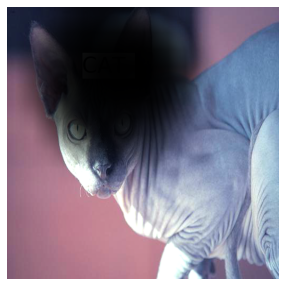

In [44]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[1])]))
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
a,b = net_r(x).tolist()[0]
catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
if catprob>dogprob: 
    test=camimg[0]-torch.min(camimg[0])
    A1=torch.exp(-0.07*test)
    X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
    Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
    x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
    (x1*0.35).squeeze().show()
else: 
        test=camimg[1]-torch.min(camimg[1])
        A1=torch.exp(-0.07*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
        (x1*0.35).squeeze().show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


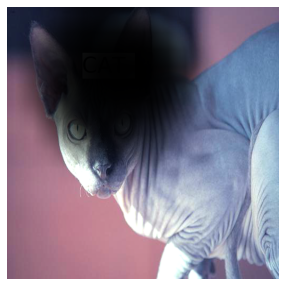

In [45]:
name = str(list(path.ls())[1]).split('/')[-1]
res1=(x1*0.35).squeeze()
res1.show()
save_image(res1, "pet3_mode1_res/"+name)
#res1.save("pet3_mode1_res/"+name)

In [46]:
res1.shape

torch.Size([3, 512, 512])

    - 전체 적용

In [47]:
path_r.ls()

(#7391) [Path('1103_pet/boxer_128.jpg'),Path('1103_pet/Sphynx_142.jpg'),Path('1103_pet/British_Shorthair_203.jpg'),Path('1103_pet/Ragdoll_142.jpg'),Path('1103_pet/Persian_272.jpg'),Path('1103_pet/Bombay_200.jpg'),Path('1103_pet/shiba_inu_103.jpg'),Path('1103_pet/chihuahua_142.jpg'),Path('1103_pet/scottish_terrier_156.jpg'),Path('1103_pet/basset_hound_163.jpg')...]

In [48]:
os.mkdir("1130_pet_mode1_res")

In [49]:
path_res1=Path('1130_pet_mode1_res') 

In [50]:
path_res1.ls()

(#0) []

In [51]:
len(path_r.ls())

7391

In [52]:
for i in range(len(path_r.ls())) :
    name = str(list(path_r.ls())[i]).split('/')[-1]  #이름통일
    #fname = name.split('.')[-1]  #.mat 구분용
    x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[i])]))  #pet3그림가져오기
    camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())   #CAM시각화
    a,b = net_r(x).tolist()[0]
    catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
    if catprob>dogprob: 
        test=camimg[0]-torch.min(camimg[0])
        A1=torch.exp(-0.07*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
        save_image((x1*0.35), "1130_pet_mode1_res/"+name)
    else: 
        test=camimg[1]-torch.min(camimg[1])
        A1=torch.exp(-0.07*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
        save_image((x1*0.35), "1130_pet_mode1_res/"+name)

ValueError: unknown file extension: 

---

## res1 학습

In [53]:
path_res1=Path('1130_pet_mode1_res') 

In [55]:
path_res1.ls()

(#6781) [Path('1130_pet_mode1_res/boxer_128.jpg'),Path('1130_pet_mode1_res/Sphynx_142.jpg'),Path('1130_pet_mode1_res/British_Shorthair_203.jpg'),Path('1130_pet_mode1_res/Ragdoll_142.jpg'),Path('1130_pet_mode1_res/Persian_272.jpg'),Path('1130_pet_mode1_res/Bombay_200.jpg'),Path('1130_pet_mode1_res/shiba_inu_103.jpg'),Path('1130_pet_mode1_res/chihuahua_142.jpg'),Path('1130_pet_mode1_res/scottish_terrier_156.jpg'),Path('1130_pet_mode1_res/basset_hound_163.jpg')...]

In [56]:
files=get_image_files(path_res1)

In [57]:
dls_r=ImageDataLoaders.from_name_func(path_res1,files,label_func,item_tfms=Resize(512)) 

In [58]:
lrnr_r1=cnn_learner(dls_r,resnet34,metrics=error_rate)
lrnr_r1.fine_tune(1)

In [59]:
net_1=lrnr_r1.model[0]
net_2=lrnr_r1.model[1] 

In [60]:
net_2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [61]:
net_r=torch.nn.Sequential(net_1,net_2)

In [62]:
lrnr_r2=Learner(dls_r,net_r,metrics=accuracy) 

In [63]:
lrnr_r2.fine_tune(10) 

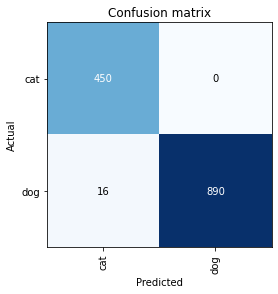

In [64]:
interp = ClassificationInterpretation.from_learner(lrnr_r2)
interp.plot_confusion_matrix()

In [65]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_res1)[4])]))

In [66]:
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].to('cpu').weight, net_1(x).to('cpu').squeeze())

In [67]:
x.shape

torch.Size([1, 3, 512, 512])

In [68]:
camimg.shape

torch.Size([2, 16, 16])

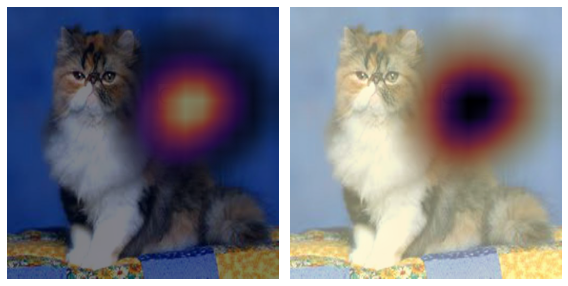

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(camimg[0].to("cpu").detach(),alpha=0.5,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(camimg[1].to("cpu").detach(),alpha=0.5,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

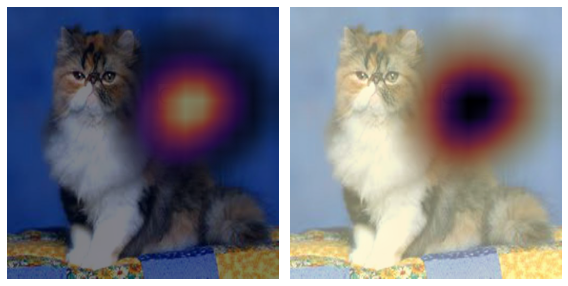

In [70]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(camimg[0].to("cpu").detach(),alpha=0.5,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(camimg[1].to("cpu").detach(),alpha=0.5,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()